In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import datetime

In [3]:
%matplotlib inline

pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',6)  # 设置显示的最大列数
pd.set_option('display.max_rows',10) # 设置显示的最大行数
pd.set_option('display.width',78) # 设置显示宽度
pd.set_option('precision',3) # 设置京都为小数点后三位 

In [4]:
stockPath = r'../YCdata/stock2015-2016.csv'

In [5]:
allData = pd.read_csv(stockPath)
allData.head(5)

  Ticker        Date     Open  ...   Close  Adj Close    Volume
0   AAPL  2015-01-02  106.239  ...  109.33    104.274  53204600
1   AAPL  2015-01-05  103.282  ...  106.25    101.337  64285500
2   AAPL  2015-01-06  101.613  ...  106.26    101.346  65797100
3   AAPL  2015-01-07  102.243  ...  107.75    102.767  40105900
4   AAPL  2015-01-08  104.179  ...  111.89    106.716  59364500

[5 rows x 8 columns]

In [7]:
allData.shape

(4536, 8)

In [8]:
allData[['Ticker','Date','Adj Close']]

     Ticker        Date  Adj Close
0      AAPL  2015-01-02    104.274
1      AAPL  2015-01-05    101.337
2      AAPL  2015-01-06    101.346
3      AAPL  2015-01-07    102.767
4      AAPL  2015-01-08    106.716
...     ...         ...        ...
4531     KO  2016-12-23     40.899
4532     KO  2016-12-27     40.909
4533     KO  2016-12-28     40.693
4534     KO  2016-12-29     40.899
4535     KO  2016-12-30     40.762

[4536 rows x 3 columns]

In [9]:
just_close_price = allData[['Ticker','Date','Adj Close']]
just_close_price.head(10)

  Ticker        Date  Adj Close
0   AAPL  2015-01-02    104.274
1   AAPL  2015-01-05    101.337
2   AAPL  2015-01-06    101.346
3   AAPL  2015-01-07    102.767
4   AAPL  2015-01-08    106.716
5   AAPL  2015-01-09    106.830
6   AAPL  2015-01-12    104.198
7   AAPL  2015-01-13    105.123
8   AAPL  2015-01-14    104.723
9   AAPL  2015-01-15    101.880

In [10]:
just_close_price.shape

(4536, 3)

In [13]:
daily_close_px = just_close_price.pivot('Date','Ticker','Adj Close')
# 透视
daily_close_px

Ticker          AA     AAPL     DAL  ...    MSFT      PEP    UAL
Date                                 ...                        
2015-01-02  37.242  104.274  47.528  ...  43.787   87.929  66.34
2015-01-05  35.084  101.337  46.735  ...  43.384   87.268  66.15
2015-01-06  35.342  101.346  45.633  ...  42.748   86.607  64.58
2015-01-07  36.257  102.767  45.392  ...  43.291   89.140  65.53
2015-01-08  37.289  106.716  46.571  ...  44.564   90.760  66.64
...            ...      ...     ...  ...     ...      ...    ...
2016-12-23  29.710  115.540  49.488  ...  62.501  103.661  74.79
2016-12-27  29.650  116.274  49.955  ...  62.540  103.701  74.67
2016-12-28  29.430  115.778  49.112  ...  62.254  103.198  73.53
2016-12-29  28.890  115.748  48.913  ...  62.165  103.562  73.28
2016-12-30  28.080  114.846  48.794  ...  61.414  103.207  72.88

[504 rows x 9 columns]

In [14]:
daily_close_px.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='Date', length=504)

In [15]:
daily_close_px.columns

Index(['AA', 'AAPL', 'DAL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP', 'UAL'], dtype='object', name='Ticker')

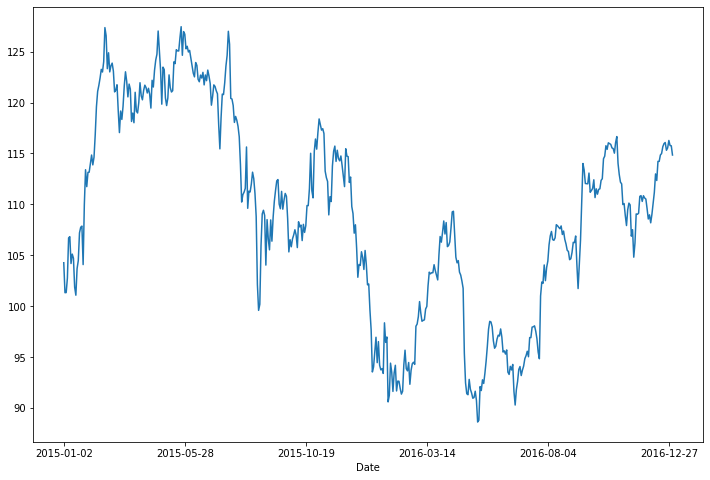

In [16]:
daily_close_px['AAPL'].plot(figsize = (12,8))

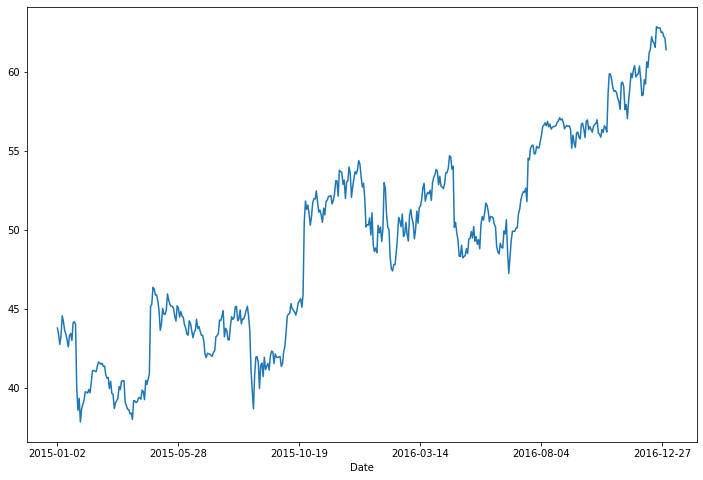

In [17]:
daily_close_px['MSFT'].plot(figsize = (12,8))

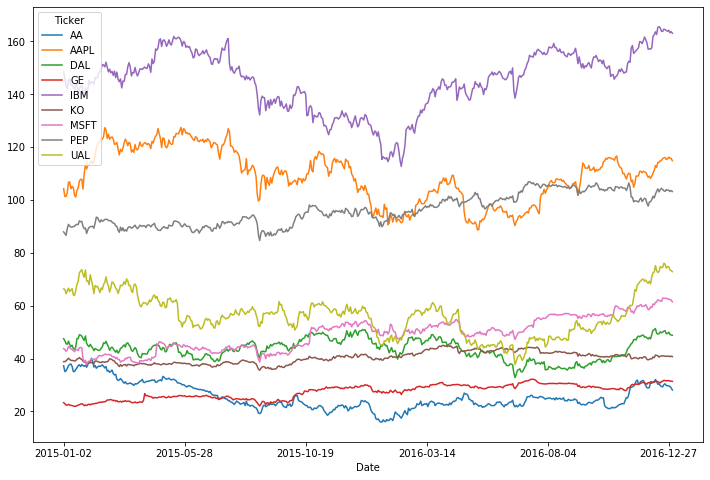

In [18]:
daily_close_px.plot(figsize = (12,8))

In [21]:
just_volumes = allData[['Ticker','Date','Volume']]
just_volumes

     Ticker        Date    Volume
0      AAPL  2015-01-02  53204600
1      AAPL  2015-01-05  64285500
2      AAPL  2015-01-06  65797100
3      AAPL  2015-01-07  40105900
4      AAPL  2015-01-08  59364500
...     ...         ...       ...
4531     KO  2016-12-23   6436600
4532     KO  2016-12-27   6999200
4533     KO  2016-12-28   8988000
4534     KO  2016-12-29   6875300
4535     KO  2016-12-30  11470200

[4536 rows x 3 columns]

In [23]:
daily_volumes = just_volumes.pivot('Date','Ticker','Volume')  #透视分组
daily_volumes

Ticker           AA      AAPL       DAL  ...      MSFT      PEP      UAL
Date                                     ...                            
2015-01-02  4340300  53204600   8637300  ...  27913900  3545700  6215000
2015-01-05  9026400  64285500  10556500  ...  39673900  6441000  5033400
2015-01-06  8063600  65797100  12880400  ...  36447900  6195000  6051700
2015-01-07  6637700  40105900  10516200  ...  29114100  6526300  5135000
2015-01-08  8185700  59364500  10499300  ...  29645200  7131600  6889500
...             ...       ...       ...  ...       ...      ...      ...
2016-12-23  2881800  14181200   4046300  ...  12403800  1769300  1623400
2016-12-27  1708900  18296900   3365600  ...  11763200  1505000  1092400
2016-12-28  2751100  20905900   4520200  ...  14653300  1878600  1946800
2016-12-29  3224400  15039500   3348300  ...  10250600  2438100  1272400
2016-12-30  2686000  30586300   4532400  ...  25579900  3484000  1720800

[504 rows x 9 columns]

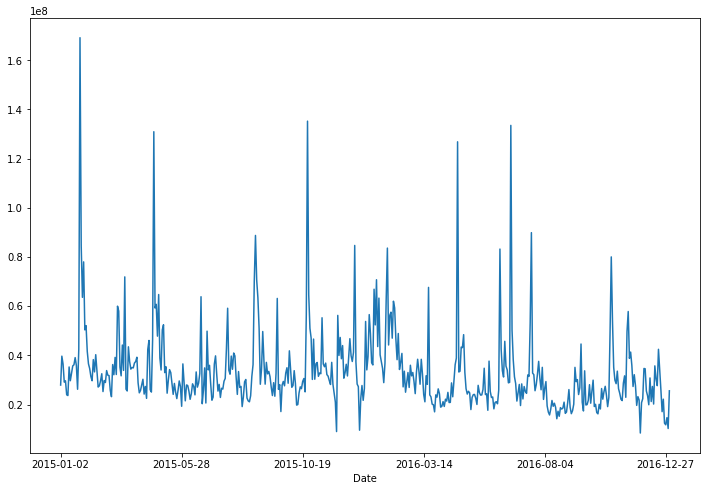

In [24]:
daily_volumes['MSFT'].plot(figsize = (12,8))